In [1]:
#pip install beautifulsoup4

In [2]:
#pip install lxml

In [3]:
#pip install selenium

In [37]:
import numpy as np
import pandas as pd 
import requests
import seaborn as sns
from bs4 import BeautifulSoup
import lxml
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from selenium import webdriver
import time

In [5]:
Adventure = requests.get('https://flixable.com/genre/action-and-adventure/?min-rating=0&audio=en&min-year=2021&max-year=2023&order=rating#filterForm')
AdventureSoup = BeautifulSoup(Adventure.text, 'html')

Children = requests.get('https://flixable.com/genre/children-and-family-movies/?min-rating=0&audio=en&min-year=2021&max-year=2023&order=rating#filterForm')
ChildSoup = BeautifulSoup(Children.text, 'html')

Comedy = requests.get('https://flixable.com/genre/comedies/?min-rating=0&audio=en&min-year=2021&max-year=2023&order=rating#filterForm')
ComedySoup = BeautifulSoup(Comedy.text, 'html')

Docu = requests.get('https://flixable.com/genre/documentaries/?min-rating=0&audio=en&min-year=2021&max-year=2023&order=rating#filterForm')
DocuSoup = BeautifulSoup(Docu.text, 'html')

Drama = requests.get('https://flixable.com/genre/dramas/?min-rating=0&audio=en&min-year=2021&max-year=2023&order=rating#filterForm')
DramaSoup = BeautifulSoup(Drama.text, 'html')

Horror = requests.get('https://flixable.com/genre/horror-movies/?min-rating=0&audio=en&min-year=2021&max-year=2023&order=rating#filterForm')
HorrorSoup = BeautifulSoup(Horror.text, 'html')

Romantic = requests.get('https://flixable.com/genre/romantic-movies/?min-rating=0&audio=en&min-year=2021&max-year=2023&order=rating#filterForm')
RomanticSoup = BeautifulSoup(Romantic.text, 'html')

Sports = requests.get('https://flixable.com/genre/sports-movies/?min-rating=0&audio=en&min-year=2021&max-year=2023&order=rating#filterForm')
SportsSoup = BeautifulSoup(Sports.text, 'html')

Thrillers = requests.get('https://flixable.com/genre/thrillers/?min-rating=0&audio=en&min-year=2021&max-year=2023&order=rating#filterForm')
ThrillersSoup = BeautifulSoup(Thrillers.text, 'html')



In [6]:
Categories = [AdventureSoup, ChildSoup, ComedySoup, DocuSoup, DramaSoup, HorrorSoup, RomanticSoup, SportsSoup, ThrillersSoup]

movies = []
years_all = []
names = []
years = []
ranking = []
list = []
numb = [0,1,2,3,4,5,6,7,8]

for i in Categories:
  list.append(i)

#Get names:
for item in numb:
  movies.extend(list[item].find_all('h5', class_="card-title"))

for name in movies:
  names.append(name.text)

#Get years and ranking
for item in numb:
  years_all.extend(list[item].find_all('div', class_="card-description"))

for year in years_all:
  years.append(year.text.split()[0])
  ranking.append(year.text.split()[-1])


In [7]:
rank = []
for i in range(len(years)):
    if years[i] != ranking[i]:
        rank.append(ranking[i])
    else:
        rank.append("nan") #we need to add something so that it matches len(years). could be anything


In [8]:
DF = pd.DataFrame()
DF['Movies'] = names
DF['Rating'] = rank 
DF['Year'] = years

DF['Year'] = DF['Year'].astype(int) 


In [10]:
DF['Rating'] = DF['Rating'].str.rstrip('/10') #removing /10 from all ratings so that we can convert them to numbers

DF['Rating'] = pd.to_numeric(DF['Rating'], errors='coerce') #convert str into number


In [14]:
DF

,Movies,Rating,Year
0,Green Snake,6.9,2021
1,New Gods: Nezha Reborn,6.7,2021
2,Sooryavanshi,6.7,2021
3,The Yin Yang Master,6.5,2021
4,Against The Ice,6.4,2022
...,...,...,...
323,Hostage House,NaN,2021
324,In for a Murder,NaN,2021
325,Kingdom: Ashin of the North,NaN,2021
326,Lethal Love,NaN,2021


Are more recent movies worse rated?

In [17]:
#Grouped DF

GR_DF = DF.groupby(['Rating'], as_index = False).agg({'Movies': [ 'count'], 'Year': ['median']})

GR_DF.head()

,Rating,Movies,Year
,,count,median
0,2.3,1,2021.0
1,2.9,1,2021.0
2,3.0,1,2021.0
3,3.6,1,2021.0
4,3.7,2,2021.0


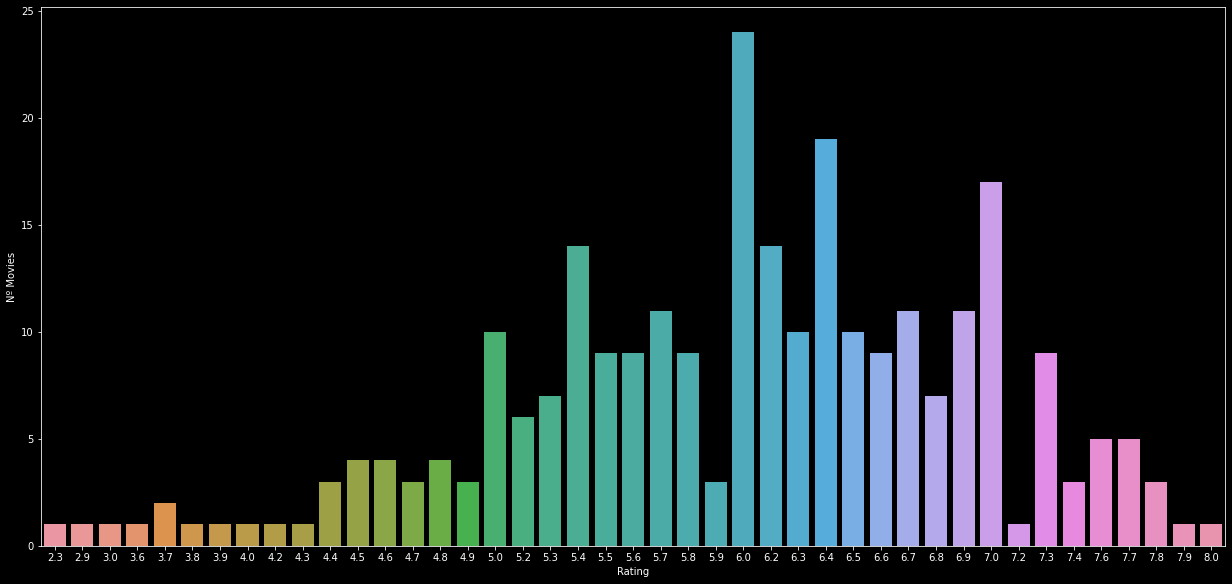

In [59]:
#Plot n Movies by rating

plt.style.use('dark_background')
plt.figure(figsize = (17,8),constrained_layout = True)
ax = sns.barplot(data = GR_DF, x = 'Rating', y = GR_DF['Movies']['count'])
ax.set_xlabel('Rating')
ax.set_ylabel('Nº Movies')
plt.show()

#Looks like normal distribution